# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [5]:
char_csv=pd.read_csv(characterization_path/'28-apr-2021'/'curvelet_abide_children_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'28-apr-2021'/'curvelet_abide_children_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [6]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [7]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Left-Cerebral-White-Matter,29864.0,1.0,ABIDE-II,EMC_1,9.013005,0.234982,0.463588,2.511944,...,2.404451e-04,1.094171e+00,4633.552736,-9.341000e-21,2.364557e-01,4.984037,-0.000171,1.759407e-01,4.064390,2.705852e-11
2,4.0,Left-Lateral-Ventricle,29864.0,1.0,ABIDE-II,EMC_1,9.013005,0.000244,0.237021,0.230826,...,1.170021e-20,3.845784e-08,0.165152,1.259712e-19,5.456192e-08,0.167944,-0.000041,7.264111e-08,0.171032,6.100242e-07
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,Left-Cerebellum-White-Matter,29864.0,1.0,ABIDE-II,EMC_1,9.013005,0.041807,0.313817,3.168550,...,-5.628855e-04,2.413168e-03,0.385328,8.572390e-20,2.547017e-03,0.404787,0.000640,1.898871e-03,0.394789,-1.151277e-08


In [8]:
len(np.unique(char_csv['subject_id'].values))

7260

In [9]:
def filter_bad_1(bad_str):
    s = bad_str.split('characterization issue on region')
    if len(s)>1:
        return int(s[1])
    else:
        return 54

In [10]:
bad_log_csv['region_issue'] = [filter_bad_1(stri) for stri in bad_log_csv['bad_log_cell1'].values]

In [11]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
0,characterization issue on region 0,29864,EMC_1,ABIDE-II,0
1,characterization issue on region 5,29864,EMC_1,ABIDE-II,5
2,characterization issue on region 30,29864,EMC_1,ABIDE-II,30
3,characterization issue on region 44,29864,EMC_1,ABIDE-II,44
4,characterization issue on region 62,29864,EMC_1,ABIDE-II,62
...,...,...,...,...,...
6430,characterization issue on region 30,50626,Yale,ABIDE-I,30
6431,characterization issue on region 44,50626,Yale,ABIDE-I,44
6432,characterization issue on region 62,50626,Yale,ABIDE-I,62
6433,characterization issue on region 80,50626,Yale,ABIDE-I,80


In [12]:
int_regions = [18,54,1002,1026,2002,2026,2031,1030,2007,1021,1032,1027,2032,2027,1008,1014,2014,1028]
bad_log_final = bad_log_csv[bad_log_csv['region_issue'].isin(int_regions)]
display(bad_log_final.head())

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
520,characterization issue on region 1032,28816,GU_1,ABIDE-II,1032
5063,characterization issue on region 1026,50122,Olin,ABIDE-I,1026
5064,characterization issue on region 2032,50122,Olin,ABIDE-I,2032
5866,characterization issue on region 1032,50283,UM,ABIDE-I,1032
5867,characterization issue on region 2032,50283,UM,ABIDE-I,2032


In [13]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_final['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

region_list=['Left Amygdala', 'Right-Amygdala','ctx-lh-caudalanteriorcingulate',
             'ctx-lh-rostralanteriorcingulate','ctx-rh-caudalanteriorcingulate',
             'ctx-rh-rostralanteriorcingulate','ctx-rh-supramarginal','ctx-lh-superiortemporal',
             'ctx-rh-fusiform','ctx-lh-pericalcarine','ctx-lh-frontalpole','ctx-lh-rostralmiddlefrontal',
             'ctx-rh-frontalpole','ctx-rh-rostralmiddlefrontal','ctx-lh-inferiorparietal',
             'ctx-lh-medialorbitofrontal','ctx-rh-medialorbitofrontal','ctx-lh-superiorfrontal']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

region_idx=int_regions

#region_list=['left frontal medial cortex']
#region_idx=[49]

[28816, 50122, 50122, 50283, 50283, 50376, 50376, 50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353]


,region
index,
2.0,Left-Cerebral-White-Matter
4.0,Left-Lateral-Ventricle
7.0,Left-Cerebellum-White-Matter
8.0,Left-Cerebellum-Cortex
10.0,Left-Thalamus-Proper
11.0,Left-Caudate
12.0,Left-Putamen
13.0,Left-Pallidum
14.0,3rd-Ventricle


In [14]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [15]:
colors=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff']]

colors=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#d5a18e', '#dec3be'],
        ['#13505b', '#040404'],
        ['#e26d5c','#723d46']]

In [16]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [17]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [18]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [19]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1296
575
ninos:  337
ninos ASD:  167
ninos control:  170
(575, 261)
{'ASD': 277, 'CONTROL': 298}
{'ASD': 277, 'CONTROL': 298}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,54.0,Right-Amygdala,28754.0,1.0,ABIDE-II,GU_1,9.298630,11.041643,10.064981,4.959532,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.298630,3.0
1,54.0,Right-Amygdala,28761.0,1.0,ABIDE-II,GU_1,11.484932,10.279044,4.417013,4.386289,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.484932,2.0
2,54.0,Right-Amygdala,28764.0,1.0,ABIDE-II,GU_1,11.608219,9.598456,7.842282,4.055813,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.608219,3.0
3,54.0,Right-Amygdala,28765.0,1.0,ABIDE-II,GU_1,12.065753,11.333382,6.471831,4.758333,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.065753,2.0
4,54.0,Right-Amygdala,28768.0,1.0,ABIDE-II,GU_1,11.358904,10.090317,128.943986,4.806308,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.358904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,54.0,Right-Amygdala,50617.0,1.0,ABIDE-I,Yale,7.250000,13.914941,5.792825,6.151364,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,7.250000,3.0
571,54.0,Right-Amygdala,50618.0,1.0,ABIDE-I,Yale,12.750000,10.490552,6.066370,4.391609,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.750000,1.0
572,54.0,Right-Amygdala,50622.0,1.0,ABIDE-I,Yale,9.920000,10.380352,4.470573,4.529438,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.920000,3.0
573,54.0,Right-Amygdala,50625.0,1.0,ABIDE-I,Yale,7.000000,11.354456,6.016461,4.646198,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,7.000000,3.0


datos de ASD: mean: 0.02665147007800782  std: 1.1116390709937145
datos de Control: mean: -0.024773346347679345  std: 0.8829480515567576


(array([ 1.,  2.,  9., 12., 22., 23., 25., 18., 28., 29., 21., 24., 18.,
        18.,  6.,  8., 11.,  2.,  6.,  2.,  3.,  2.,  4.,  0.,  0.,  1.,
         0.,  0.,  1.,  2.]),
 array([-1.77888646, -1.60201406, -1.42514166, -1.24826925, -1.07139685,
        -0.89452445, -0.71765205, -0.54077964, -0.36390724, -0.18703484,
        -0.01016244,  0.16670997,  0.34358237,  0.52045477,  0.69732717,
         0.87419958,  1.05107198,  1.22794438,  1.40481678,  1.58168919,
         1.75856159,  1.93543399,  2.11230639,  2.2891788 ,  2.4660512 ,
         2.6429236 ,  2.819796  ,  2.99666841,  3.17354081,  3.35041321,
         3.52728562]),
 <a list of 30 Patch objects>)

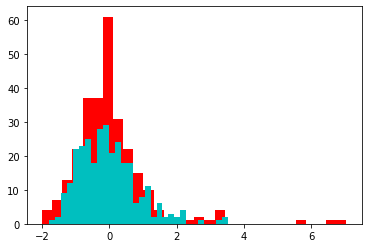

In [20]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==54]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in discard_q_csv['ID'].values:
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

print(len(np.unique(features_merge['subject_id'])))

print('ninos: ', len(phen_csv.query('EDAD>=19')))
print('ninos ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
print('ninos control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv('adults_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [21]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['EMC_1', 'GU_1', 'IP_1', 'KKI_1', 'NYU_1', 'NYU_2', 'OHSU_1',
       'SDSU_1', 'STANFORD', 'TCD_1', 'UCD_1', 'UCLA_1', 'U_MIA_1',
       'USM_1', 'KKI', 'Leuven', 'MaxMun', 'NYU', 'OHSU', 'Olin', 'Pitt',
       'SDSU', 'Stanford', 'Trinity', 'UCLA', 'UM', 'USM', 'Yale'],
      dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [22]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [23]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [24]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [25]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [26]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [27]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

In [29]:
#map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [30]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx]
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+'/results/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+'/results/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+'/results/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+'/results/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+'/results/'+region_name):
        os.makedirs(os.getcwd()+'/results/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+'/results/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Left Amygdala
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:22<00:00,  2.96it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07678891249473203
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.26657622619272797
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0021128911794310607
quartiles
[2, 1]
[-0.7088382086623566, 0.6781047974696626]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.21169878773994294
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2517740641638376
caracteristica numero: 6
sub-banda: 2
t-test: 0.5701012123497817
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.418895685292899
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.37001211910942394
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3389918437020902
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.14212505992510766
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4096943868993285
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3389918437020902
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2272931314558354
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3062005286

caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.01941256311158264
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.13600371435946335
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.2012360360169516
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.36282731906841537
caracteristica numero: 169
sub-banda: 57
t-test: 0.02352667883374676
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.29953461191349195
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.20378648310772446
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.015919992751800373
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.3067295681770017
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.16140936697867797
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.00010854035802014734
quartiles
[2, 1]
[-0.7885389819249832, 0.7968147680904105]
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.023591839246327635
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.17471881932004846
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Right-Amygdala
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:19<00:00,  3.08it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 1.8594867017074836e-05
quartiles
[2, 1]
[-0.6966436978773674, 0.7394806725161709]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.08672595031815478
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0005767408384497546
quartiles
[2, 1]
[-0.7104337929452134, 0.5887239357208319]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.16933901369097232
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2738879178306862
caracteristica numero: 6
sub-banda: 2
t-test: 0.5240146183456995
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.18285638088526313
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.48206843390951826
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4616786600685317
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04606908112912706
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.33057514845901315
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4616786600685317
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0295001579573

caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.03764674421250909
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.16959074259140844
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.05182010606050479
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.036910983354186355
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.16719202863889343
caracteristica numero: 121
sub-banda: 41
t-test: 0.6273029763793116
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.1640667226117447
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4220380935521046
caracteristica numero: 124
sub-banda: 42
t-test: 0.19162195926327555
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.1107519362197677
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.45330866234207456
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.1192325359839988
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.08800266188424816
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.15360707195017326
caracteristica

caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3450801139211935
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.19570628092807751
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0007855515241517859
quartiles
[2, 1]
[-0.8036665286791045, 0.7813572711586252]
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.35681407235420104
caracteristica numero: 225
sub-banda: 75
t-test: 0.3129142944773951
caracteristica numero: 226
sub-banda: 76
wilcoxon: 6.9216874772519715e-06
quartiles
[2, 1]
[-0.8254692842714293, 0.8297344747289055]
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.037853233781703396
caracteristica numero: 228
sub-banda: 76
t-test: 0.8251425039065978
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.02309294161366207
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.402485372779798
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.1548558797191062
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.029872903265068335
caracteristica numero: 233
sub-ba

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-caudalanteriorcingulate
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:45<00:00,  2.30it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1374340288420508
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.08039931707632109
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.08744238663845239
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05685448319916265
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4483366424131825
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.008250722480733635
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09881197119702018
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.023844668391562702
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4962922801955327
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09855002645315297
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.017182245977178146
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4962922801955327
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.39260321323026315
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2641063585770418
caracteristica numero: 15
sub-banda: 5
t-test

caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.411452657265747
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.33221533232799944
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3719105383521015
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.30884974641031004
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.22942020059341217
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.3474896856488948
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.38682191618877737
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.3891315017475494
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2986624239832093
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.10370491346060678
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.12575699703411064
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.17355696389623232
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.2860623758521612
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.30040794083188205
caracteristic

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-rostralanteriorcingulate
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:46<00:00,  2.29it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.24572391507044405
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4318907910168712
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.002370510687571417
quartiles
[2, 1]
[-0.6877943347014571, 0.8155867374834924]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.045923686470980316
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3280302159188413
caracteristica numero: 6
sub-banda: 2
t-test: 0.7315678620456008
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006919696895006645
quartiles
[2, 1]
[-0.735649816921915, 0.6449504550656503]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.035948299605944554
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.27155075356050007
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0021739390637859506
quartiles
[2, 1]
[-0.7145066288903272, 0.6026418703985401]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0338573459319743
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.27155075356050007
carac

caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.003373523209956122
quartiles
[2, 1]
[-0.7428166679879791, 0.8587350717343316]
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.0254099245527539
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.10999437951547364
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.4828693431135167
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.49248468810205853
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.03889958767005196
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4279444153536719
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.15182896491304354
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.24225720571912968
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.20109489751041654
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.45261232924965217
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.3430461355142858
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.18179327749363183
caracteristica numero

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-caudalanteriorcingulate
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:56<00:00,  2.08it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4708648123735359
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.39743918964248237
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.2843562029606863
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.28028134634948454
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.46367408204241894
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.15467413039713207
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.15336919755937883
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.39802058370504523
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1781029488195094
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.039410139928852374
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.11227824970021799
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1781029488195094
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.37896148613935
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.07613938956135792
caracteristica numero: 15
sub-banda: 5
t-test: 0.

sub-banda: 42
wilcoxon: 0.4330760489926534
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.09977679401849904
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.029872877078238096
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.46886633314609194
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.24921708581429958
caracteristica numero: 129
sub-banda: 43
t-test: 0.7294332740060179
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.13987788655398586
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.35793890227250924
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.10438501080580992
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.08640894590634274
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.47746472846918564
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.06715237701658301
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.4553000346038113
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.11873306463590194
caracteristica numero: 138
sub-banda:

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-rostralanteriorcingulate
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:27<00:00,  2.77it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0040150437903851924
quartiles
[2, 1]
[-0.6598524958263601, 0.8476419497402952]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.29813968461933904
caracteristica numero: 3
sub-banda: 1
t-test: 0.0034732164644060183
quartiles
[2, 1]
[-0.8069039725555083, 0.7716398668603341]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.009126952305718625
quartiles
[2, 1]
[-0.7329637598514471, 0.7940200426534864]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4541052739299246
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4278398221330618
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03496747394108673
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.49829643371513727
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.013597454385871554
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04173066270684548
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4094991348939618
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.013597454385871554
ca

caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.15360707195017326
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.3161404648441079
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.2194906329968223
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.27038590753102665
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.40443059724967556
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.22262296511262258
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.2972693606113544
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.40443059724967556
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05812762274264364
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.36509113028868057
caracteristica numero: 117
sub-banda: 39
t-test: 0.2628192956346025
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.04931106536307723
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.1073722263764833
caracteristica numero: 120
sub-banda: 40
t-test: 0.9614954419704409
caracteristica n

caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2386614500418341
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.16870554296367557
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.03822724365504972
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.22835527420375235
caracteristica numero: 240
sub-banda: 80
t-test: 0.8858802287878379
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.03642703897780996
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.14531194723373547
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.006034233191976162
quartiles
[2, 1]
[-0.01868098156435865, 0.060701441029264704]


  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-supramarginal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:44<00:00,  2.33it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.11793698823208787
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21874858857898627
caracteristica numero: 3
sub-banda: 1
t-test: 0.00032658130287100453
quartiles
[2, 1]
[-0.8534654297098514, 0.7749058572550994]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07164058679632378
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.252094657616006
caracteristica numero: 6
sub-banda: 2
t-test: 0.5581658100311613
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.028766245821113954
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11430426637901198
caracteristica numero: 9
sub-banda: 3
t-test: 0.15130703284133448
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.011772526758003547
quartiles
[2, 1]
[-0.844188776864528, 0.694552574806879]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04631222704223719
caracteristica numero: 12
sub-banda: 4
t-test: 0.15130703284133415
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.02320303319304998
ca

quartiles
[2, 1]
[-0.8169990956749962, 0.5843651301895949]
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.03461979842429279
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3456356160089208
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.006350400957495595
quartiles
[2, 1]
[-0.7975907817732346, 0.5501588732869862]
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.04097458275678796
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.40112514774883984
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.03465828827717053
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.13070431540514255
caracteristica numero: 129
sub-banda: 43
t-test: 0.18498126352765693
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.03284999980436073
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.12774101662414727
caracteristica numero: 132
sub-banda: 44
t-test: 0.04810987992422924
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.050605477806793184
caracteristica numero: 134
sub-ba

caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3238665805380714
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4042359675997865
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.46806705211540245
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.4654707449406589
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.35925276380038473
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.38951649529511756
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4259739014133904
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.475263979709618
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.42203846154370805
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.07478191883916471
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.04734471244594822
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.07295435221917526
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.02906462685186197
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.050553186733492426
caracterist

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-superiortemporal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:28<00:00,  2.74it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46267625365060894
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.39434229792607434
caracteristica numero: 3
sub-banda: 1
t-test: 0.0016796042057007773
quartiles
[2, 1]
[-0.7925184736159423, 0.8140577013597983]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4618781597006956
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.18338938469424504
caracteristica numero: 6
sub-banda: 2
t-test: 0.6733601338574571
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4200736312889206
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1995462957179147
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2157948872582109
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.30690600425971026
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1584158460299363
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2157948872582109
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.27088482131500463
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.41360406843

caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.3136434185846274
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.37609798830032637
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.44218226241200925
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.27522789068492703
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.40365222103311404
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.22789972897327948
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.27522789068492703
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4764642988752466
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.28452660120587425
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.011974643099002463
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.4996993697704133
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.27606700943268575
caracteristica numero: 144
sub-banda: 48
t-test: 0.11254489385129225
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.44376921515487483
caracteris

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-fusiform
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:35<00:00,  2.55it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.010314386446399227
quartiles
[2, 1]
[-0.5984015631273936, 0.24938505245217774]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.026966360884425694
caracteristica numero: 3
sub-banda: 1
wilcoxon: 5.0712681899998684e-05
quartiles
[2, 1]
[-0.7773761782506621, 0.6919756883033475]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0060514249985788755
quartiles
[2, 1]
[-0.7998450386274284, 0.6191451165601332]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.020931191973902995
quartiles
[2, 1]
[-0.7938006699394082, 0.7495054742515331]
caracteristica numero: 6
sub-banda: 2
t-test: 0.1956675496058809
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07414538709302076
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11596333849871326
caracteristica numero: 9
sub-banda: 3
t-test: 0.24890367834527763
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04071039864523534
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.09018880863531459
caracteris

caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.3229643283498409
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.006216924610310468
quartiles
[2, 1]
[-0.6912297104564311, 0.5587691852050918]
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.02090592431803269
quartiles
[2, 1]
[-0.7122531682263512, 0.6685469158240442]
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.3229643283498409
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.009164103618466531
quartiles
[2, 1]
[-0.7346201522392928, 0.49189893735291507]
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.02715459567098567
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.41820888377549026
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.010424947427890227
quartiles
[2, 1]
[-0.7164364624145471, 0.5070123377271333]
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0282095853738149
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3190068414911006
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.005365616329

[2, 1]
[-0.8161553165584798, 0.5565089308123227]
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0004793276682547888
quartiles
[2, 1]
[-0.6399794727711828, 0.5743607999224408]
caracteristica numero: 201
sub-banda: 67
t-test: 0.34640669381632705
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.00047165780209816794
quartiles
[2, 1]
[-0.7713883262602782, 0.4505199363328853]
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0021739390637859506
quartiles
[2, 1]
[-0.7577496192534521, 0.5843537788903207]
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.2012360360169516
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.001598097255968608
quartiles
[2, 1]
[-0.1162152182425637, -0.07589796127111377]
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.004639920057163887
quartiles
[2, 1]
[-0.06490297399291595, -0.06487411335172702]
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.24485454956167085
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.005412205889112703
quart

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-pericalcarine
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:30<00:00,  2.68it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07344299260603315
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15277557975969552
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09125567477660124
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05192681166276402
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.052895036741333994
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.13666210761835684
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05171357480058265
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.09299879561551022
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.22835527420375235
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.01458882889984046
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.013492906005285672
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.22835527420375235
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.18033783781406154
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.19968678040298832
caracteristica numero: 15
sub-banda: 5
t-

sub-banda: 51
wilcoxon: 0.46207766892488317
caracteristica numero: 153
sub-banda: 51
t-test: 0.3114974425664792
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.34953338323287
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.4226282915539688
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.4035549492715611
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.004687710296739325
quartiles
[2, 1]
[-0.7848055841275955, 0.6376160938916806]
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.008858515803230112
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.04734471244594822
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.03932467127453637
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0747109878665023
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.04734471244594822
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.1778411734293292
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.19744617117286073
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-frontalpole
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:24<00:00,  2.89it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4370312001572882
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0630712022164631
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4038467794452909
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4838705729245725
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.20707370674026165
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.12650006903793287
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1782339275597386
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.22668744478611347
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2605050943139296
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.085541652003642
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08100068953326467
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2605050943139296
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3273045498084189
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.45878702347569383
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.42

caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.328393292769515
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.0468977907633352
caracteristica numero: 133
sub-banda: 45
t-test: 0.8489845444785635
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.12742630852458958
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.0016374912506439295
quartiles
[1, 2]
[-0.5926404473525104, 0.5249138847826066]
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.456495199709774
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.4841709617396117
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.0016374912506439295
quartiles
[1, 2]
[-0.5926404473525104, 0.5249138847826068]
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.06643675084592479
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.030009411989160868
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.22139820105200653
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.3369716333260818
caracteristica numero: 143
sub-band

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-rostralmiddlefrontal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:26<00:00,  2.80it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.09308241109873772
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1585373172109173
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07274569827415749
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10543539594422485
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.13809762577774232
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.04191017908966704
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.04568218157394046
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.04119579688822858
caracteristica numero: 9
sub-banda: 3
t-test: 0.41085611790962806
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08367202725476408
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.07330312635159188
caracteristica numero: 12
sub-banda: 4
t-test: 0.41085611790962706
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.024099771265921634
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.015040553491823915
quartiles
[2, 1]
[-0.7879391461595612, 0.79969

caracteristica numero: 120
sub-banda: 40
t-test: 0.044817106904403846
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.03314586380752734
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.023120423189780692
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.012896768018235288
quartiles
[2, 1]
[-0.06281383894189238, -0.03232803429851143]
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.039239353505199234
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.028437702920894276
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.32044357262614964
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.01632479066192446
quartiles
[2, 1]
[-0.7800492154789652, 0.6249592814924252]
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.018257218204906896
quartiles
[2, 1]
[-0.8354459438000637, 0.7845356866450682]
caracteristica numero: 129
sub-banda: 43
t-test: 0.1053867378759412
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.024099771265921634
caracteristica numero: 131
sub-banda:

quartiles
[2, 1]
[-0.5811543168729736, 0.21591647262482855]
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.00958158626889732
quartiles
[2, 1]
[-0.7498916049837548, 0.6252104238979019]
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4834700684411708
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.013081622536477525
quartiles
[1, 1]
[-0.5928799406616589, 0.2535621742427706]
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.01422135805773754
quartiles
[1, 1]
[-0.7317703837431951, 0.6504827967110308]
caracteristica numero: 225
sub-banda: 75
t-test: 0.5673913864034281
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.08374931030369992
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.09059804003527006
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.02487887433477068
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.09759391179511184
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.11141785900246703
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.035

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-frontalpole
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:26<00:00,  2.81it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.13633287900467822
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.03158108131816937
caracteristica numero: 3
sub-banda: 1
t-test: 0.7086137299036226
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.23370762312871718
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15182896491304354
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.06901538762019986
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.37838824918921854
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.016010090505156945
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.07839436276139307
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.025025446265876224
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.00030151994783940997
quartiles
[2, 1]
[-0.1654467723047387, -0.1494767650581559]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.07839436276139307
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.46147917007827843
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0

quartiles
[2, 1]
[-0.637252851295006, 0.49159207223733914]
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.12716150280135918
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.3380729878840113
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.37667014813730204
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.1721436118099577
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1073722263764833
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.01675928377944043
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.23555859834549936
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.41379978097245707
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.16233321332815226
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.4670683708731331
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.2893174392091134
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.07780764330321194
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.031332222139855405
caracteristica numero:

caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.03357498736713568
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.23912879922849406
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.1445107540376745
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.06807177718061204
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.12554941019070326
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.06893417906771854
caracteristica numero: 228
sub-banda: 76
t-test: 0.6724868966620827
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3181102616378215
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4196809025162935
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.11420647973749065
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.12003477149704156
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.12165063779453761
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.1139156824785727
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.17994217214952385
caracteristic

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:30<00:00,  2.69it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.44933048968085154
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4780650548062022
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.04553776936552448
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4930858502360441
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.44972811796783146
caracteristica numero: 6
sub-banda: 2
t-test: 0.600118460484347
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.36717043141956557
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4307061458216159
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.23928469336866665
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.31293122989520933
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3032102919064378
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.23928469336866665
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3327627772347773
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3500915160763763
caracteristica numero: 15
sub-banda: 5
t-test: 0.5680

caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.31453463186212305
caracteristica numero: 120
sub-banda: 40
t-test: 0.5947547423553122
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.36584678465222387
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.40015429063430724
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.22638494335527287
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.37343152714564787
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.43129839116871993
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.29674772412360617
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.2738879178306862
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3413853442222444
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.06031920655139299
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.3011074311247858
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.3566267213679949
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.012412131088712525
quartiles
[2

caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.36329841140780716
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.020805111733106684
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.009698291970223757
quartiles
[2, 1]
[-0.250152913402952, 0.5712004671174894]
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.3698224521783925
caracteristica numero: 214
sub-banda: 72
t-test: 0.0022659044534558046
quartiles
[2, 1]
[-0.6460679338132458, 0.7442063197108456]
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.00018323503361153865
quartiles
[2, 1]
[-0.10454903367190352, 0.6416374476158633]
caracteristica numero: 216
sub-banda: 72
t-test: 0.15022077093958294
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.003967523495800941
quartiles
[2, 1]
[-1.1703118540281887, 0.8102453854058645]
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.001544396002619757
quartiles
[2, 1]
[-1.0387947129602708, 0.7553846785625769]
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.480266666

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-inferiorparietal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:38<00:00,  2.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.34823233936461917
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4796661646850907
caracteristica numero: 3
sub-banda: 1
t-test: 0.29500782078493815
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.30567189298818265
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3437852417274308
caracteristica numero: 6
sub-banda: 2
t-test: 0.7919218289262401
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11635618065450531
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15805179890428783
caracteristica numero: 9
sub-banda: 3
t-test: 0.7440201557097048
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.18046984758972429
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.27859187679515957
caracteristica numero: 12
sub-banda: 4
t-test: 0.7440201557097019
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3598163582927135
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3837487059297381
caracteristica numero: 15
sub-banda: 5
t-test: 0.566275396

caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.37001212108650383
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.36282731906841537
caracteristica numero: 144
sub-banda: 48
t-test: 0.2443700197766292
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.4622771876912001
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.40813300193263813
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3303931032581373
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.4336689045058779
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.4922843044497018
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.38106562465213856
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.45629597789493653
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.495891459102044
caracteristica numero: 153
sub-banda: 51
t-test: 0.9444778396872875
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.00680426871666899
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.0051156917948543155
caracteristica n

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-medialorbitofrontal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:29<00:00,  2.71it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0857775376057851
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.10289244161519984
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07442777729126666
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.14473936206410298
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.16468873262649575
caracteristica numero: 6
sub-banda: 2
t-test: 0.11907121372356871
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07628336536266851
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08390403724531786
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3726707865254073
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0665015627840204
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.07088832539468395
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3726707865254073
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.16295095018332922
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1827232811594119
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0

quartiles
[2, 1]
[-0.6785152343963728, 0.561983547548727]
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.05311213057793306
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.021779643334820662
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.008150078376502643
quartiles
[2, 1]
[-0.7038289169901013, 0.4953144695068185]
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.1925981290521947
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.015367752343733034
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.005130538434222402
quartiles
[2, 1]
[-0.748438183755346, 0.6558379324365475]
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.12451506323078387
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.01186544038817177
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.005175308732126143
quartiles
[2, 1]
[-0.7378469610083433, 0.6253628973978358]
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.12451506323078387
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-rh-medialorbitofrontal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:29<00:00,  2.73it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.021108790317567537
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.03259290779551375
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.08367202725476408
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05789449133015925
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07868897754295756
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.2522549644424514
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3458208573315768
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3719105422528433
caracteristica numero: 9
sub-banda: 3
t-test: 0.6899391448625427
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.11411019824622437
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.13425736152004725
caracteristica numero: 12
sub-banda: 4
t-test: 0.6899391448625447
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.047047851759513176
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05719950524281055
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0

[2, 1]
[-0.3981706865076923, -0.13569254166637307]
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.0035997163217922298
quartiles
[2, 1]
[-0.6855616069729833, 0.24983894714922583]
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.013090077972130425
quartiles
[2, 1]
[-0.6687002365128757, 0.6300081018247989]
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.025084277393600467
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.02883233167651113
caracteristica numero: 120
sub-banda: 40
t-test: 0.7896086433722701
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.018896837170587072
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.03201149674040713
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.2053548366302283
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.04200019714536528
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.0694020247985244
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.04539372446169821
caracteristica numero: 127
sub-banda: 43
wilcoxon

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ctx-lh-superiorfrontal
{'ASD': 277, 'CONTROL': 298}
balanced
{'ASD': 277, 'CONTROL': 298}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:26<00:00,  2.80it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.010564600160684775
quartiles
[2, 1]
[-0.7436773800179566, 0.7112940254040083]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.05118352742210363
caracteristica numero: 3
sub-banda: 1
t-test: 0.0013605802590928085
quartiles
[2, 1]
[-0.8365314256868905, 0.8554503664519958]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.02268400780983771
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.03469681326792369
caracteristica numero: 6
sub-banda: 2
t-test: 0.535106414108822
caracteristica numero: 7
sub-banda: 3
t-test: 0.38496041634461897
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2905210453223465
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2972693606113544
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1487794323855049
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.27977398476286397
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2972693606113544
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.07972673862360752
car

caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.0031266309497664786
quartiles
[2, 1]
[-0.13613003874050097, -0.13605546068875976]
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.021108790317567537
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.39434229792607434
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.3083191006163595
caracteristica numero: 111
sub-banda: 37
t-test: 0.02677060551448351
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.37210055663822067
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.47606416821744396
caracteristica numero: 114
sub-banda: 38
t-test: 0.026770605514483414
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.0245878896254409
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.06515075681994201
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.04281726508566272
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.08085007867588301
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.13523778069917608
caracteristica nu

caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.003332878693644037
quartiles
[2, 1]
[-0.3009424769938272, -0.3008753918609164]
caracteristica numero: 201
sub-banda: 67
t-test: 0.5744436463675264
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.3436004090571084
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.30849593812304665
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.1188328404705789
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.012863401927331116
quartiles
[1, 2]
[-0.7908595988451639, 1.1204456284021937]
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.012468796313336843
quartiles
[1, 2]
[-0.3891059132326264, 0.08182249210237977]
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.45470259379039035
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.3528870188035963
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.1832560430184812
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.4839706990759328
caracteristica numero: 211
sub-banda: 71
wilc

In [85]:
print(np.unique(sub_bands_region))

[]


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
